# Load user files into Logomaker

This tutorial shows how to load data from a user's file into logomaker to generate a sequence logo. This tutorial will demonstrate how to load a matrix file, with matrix elements representing character heights, into logomaker. It then shows how to load a list of sequences from a fasta file, and use these sequences to create a probability logo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

import logomaker

## Load matrix from a text file

We will now load file containing a matrix, with the elements of matrix representing character heights at each position

In [2]:
crp_matrix_df = pd.read_csv('crp_matrix.txt', delim_whitespace=True, index_col=0)
crp_matrix_df.head()

,A,C,G,T
pos,,,,
0,0.00,0.55,0.45,0.19
1,0.00,0.92,0.65,0.31
2,0.00,0.96,0.72,0.11
3,0.21,1.04,1.06,0.00
4,0.13,0.46,0.32,0.00


This dataframe can be input to logomaker, along with styling options.

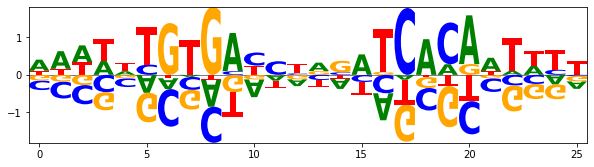

In [3]:
logomaker.Logo(-crp_matrix_df, center_values=True)

## Load sequences from a FASTA file

We use pandas to quickly load and extract binding site sequences from a FASTA file.

In [4]:
crp_sites_df = pd.read_csv('crp_sites.fasta', comment='>', names=['site'])
crp_sites_df.head()

,site
0,ATAAGCAGGATTTAGCTCACACTTAT
1,AAAAATGTGATACCAATCACAGAATA
2,ATATTGGTGATCCATAAAACAATATT
3,ATATTGGTGAGGAACTTAACAATATT
4,GATTATTTGCACGGCGTCACACTTTG


A simple list of sites can then be extracted from the dataframe.

In [5]:
crp_sites_list = crp_sites_df['site'].values
crp_sites_list[:10]

array(['ATAAGCAGGATTTAGCTCACACTTAT', 'AAAAATGTGATACCAATCACAGAATA',
       'ATATTGGTGATCCATAAAACAATATT', 'ATATTGGTGAGGAACTTAACAATATT',
       'GATTATTTGCACGGCGTCACACTTTG', 'CAAAGTGTGACGCCGTGCAAATAATC',
       'CTTTCTTCGTAACGCCTCGCAAATTT', 'TTATATGTGGTGCTAATACCCGGTTC',
       'GAACCGGGTATTAGCACCACATATAA', 'AGAAGTTTGAATTGTTACAAAAAGAC'],
      dtype=object)

These sequences are loaded into logomaker using the `alignment_to_matrix` function, as shown below,

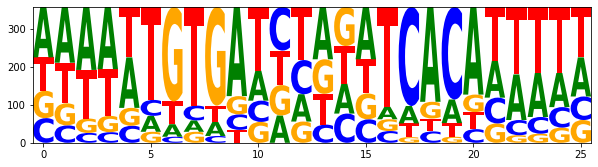

In [6]:
crp_counts_df =logomaker.alignment_to_matrix(sequences=crp_sites_list, to_type='counts')
logomaker.Logo(crp_counts_df)